# LATIHAN 1


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = np.loadtxt("/content/drive/MyDrive/diabetes_data.csv",  delimiter =',')
print (f'Dataset shape: {df.shape}\n')
print(df)

Dataset shape: (768, 9)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [ ]:
# split dataset into train and test with 80/20 proportion
X = df[:, :8]
y = df[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=0)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150,
                    batch_size =16, verbose=0)

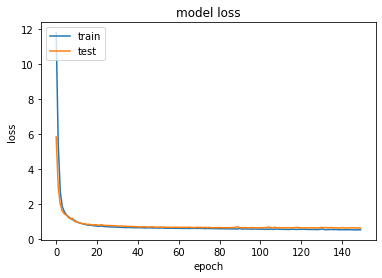

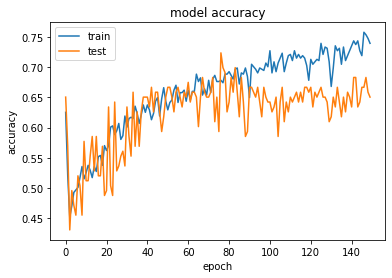

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = (model.predict(X_train) > 0.5).astype('int32')
y_test_pred = (model.predict(X_test) > 0.5).astype('int32')

5/5 [==============================] - 0s 3ms/step


In [ ]:
print(accuracy_score(y_test,y_test_pred))
print(accuracy_score(y_train,y_train_pred))

0.7272727272727273
0.7247557003257329


In [ ]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       107
         1.0       0.56      0.47      0.51        47

    accuracy                           0.73       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.72      0.73      0.72       154

[[90 17]
 [25 22]]
